# EDA - Ratings

In [37]:
%load_ext autoreload
%load_ext nb_black
%autoreload 2

import sys; sys.path.append("../../")

from pathlib import Path

import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

from src.util.data import get_interactions, get_sparsity_factor

RATINGS_PATH = Path("../../data/ratings_small.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [38]:
ratings = pd.read_csv(RATINGS_PATH)

user_encoder = LabelEncoder()
user_encoder.fit(ratings["userId"].values)

movie_encoder = LabelEncoder()
movie_encoder.fit(ratings["movieId"].values)

interactions = get_interactions(
    ratings,
    user_encoder,
    movie_encoder
)

Building interaction matrix: 100%|██████████| 100004/100004 [00:00<00:00, 2082771.04it/s]


<IPython.core.display.Javascript object>

In [39]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


<IPython.core.display.Javascript object>

In [40]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


<IPython.core.display.Javascript object>

In [41]:
min_rating = ratings["rating"].values.min()
max_rating = ratings["rating"].values.max()

print(f"Min rating: {min_rating}")
print(f"Max rating: {max_rating}")

Min rating: 0.5
Max rating: 5.0


<IPython.core.display.Javascript object>

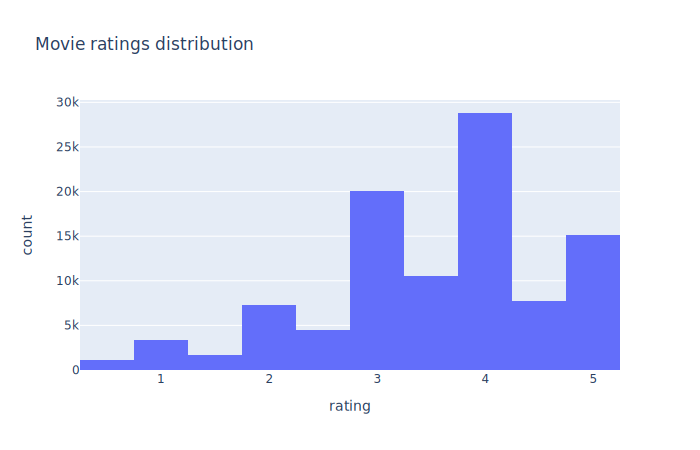

<IPython.core.display.Javascript object>

In [42]:
fig = px.histogram(ratings, x="rating", title="Movie ratings distribution")
fig.show(renderer="svg")

In [43]:
sparsity_factor = get_sparsity_factor(interactions)
print(f"Sparsity factor: {(sparsity_factor * 100):.4}%")

Sparsity factor: 1.644%


<IPython.core.display.Javascript object>

In [44]:
movie_stats = ratings.groupby("movieId").agg({"rating": ["mean", "std", "count"]})
movie_stats.columns = movie_stats.columns.get_level_values(1)

movie_stats.head()

,mean,std,count
movieId,,,
1,3.872470,0.958981,247
2,3.401869,0.880714,107
3,3.161017,1.150115,59
4,2.384615,0.938835,13
5,3.267857,0.948512,56


<IPython.core.display.Javascript object>

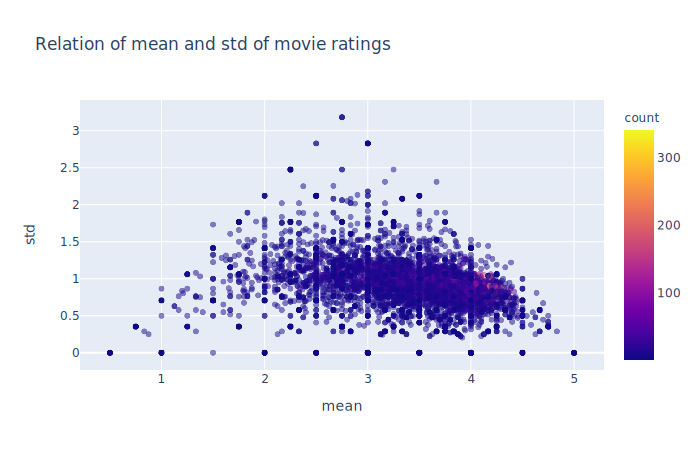

<IPython.core.display.Javascript object>

In [45]:
fig = px.scatter(
    x=movie_stats["mean"].values,
    y=movie_stats["std"].values,
    title="Relation of mean and std of movie ratings",
    color=movie_stats["count"].values,
    opacity=0.5,
    labels={
        "x": "mean",
        "y": "std",
        "color": "count"
    }

)

fig.show(renderer="svg")

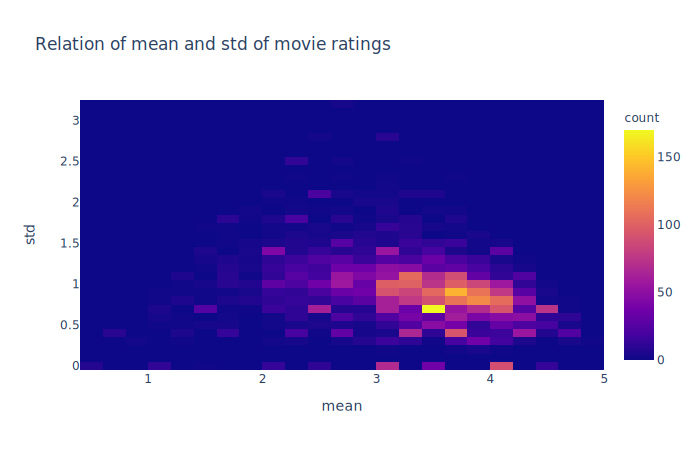

<IPython.core.display.Javascript object>

In [46]:
fig = px.density_heatmap(
    x=movie_stats["mean"].values,
    y=movie_stats["std"].values,
    title='Relation of mean and std of movie ratings',
    labels={
        "x": "mean",
        "y": "std",
        "color": "count"
    }
)

fig.show(renderer="svg")

In [47]:
user_stats = ratings.groupby("userId").agg({"rating": ["mean", "std", "count"]})
user_stats.columns = user_stats.columns.get_level_values(1)

user_stats.head()

,mean,std,count
userId,,,
1,2.550000,0.887041,20
2,3.486842,0.901753,76
3,3.568627,0.741752,51
4,4.348039,0.947616,204
5,3.910000,0.565775,100


<IPython.core.display.Javascript object>

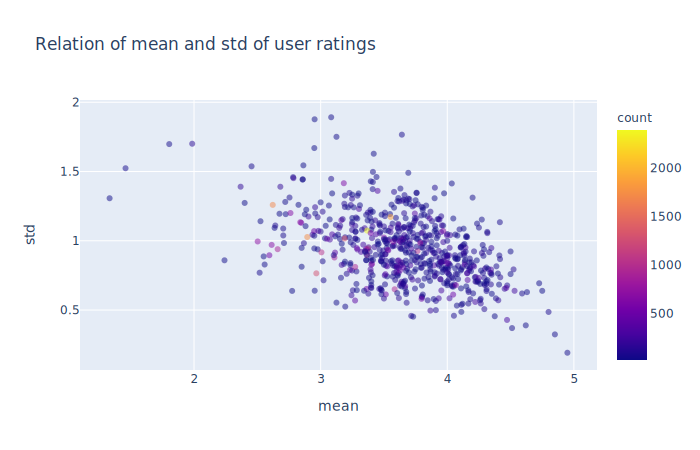

<IPython.core.display.Javascript object>

In [49]:
fig = px.scatter(
    x=user_stats["mean"].values,
    y=user_stats["std"].values,
    title="Relation of mean and std of user ratings",
    color=user_stats['count'].values,
    opacity=0.5,
    labels={
        "x": "mean",
        "y": "std",
        "color": "count"
    }

)

fig.show(renderer="svg")

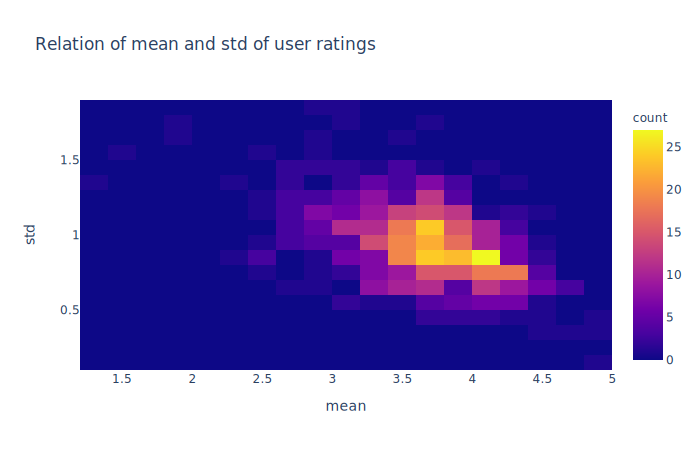

<IPython.core.display.Javascript object>

In [50]:
fig = px.density_heatmap(
    x=user_stats["mean"].values,
    y=user_stats["std"].values,
    title="Relation of mean and std of user ratings",
    labels={
        "x": "mean",
        "y": "std",
        "color": "count"
    }
)

fig.show(renderer="svg")

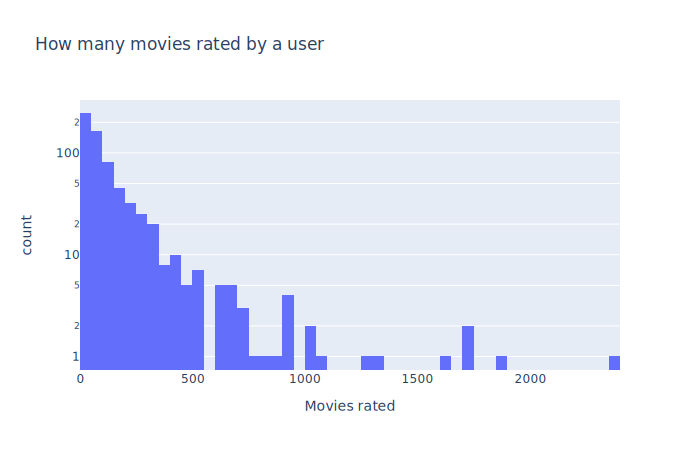

<IPython.core.display.Javascript object>

In [53]:
fig = px.histogram(
    user_stats,
    x="count",
    title="How many movies rated by a user",
    labels={
        "count": "Movies rated"
    },
    log_y=True
)

fig.show(renderer="svg")

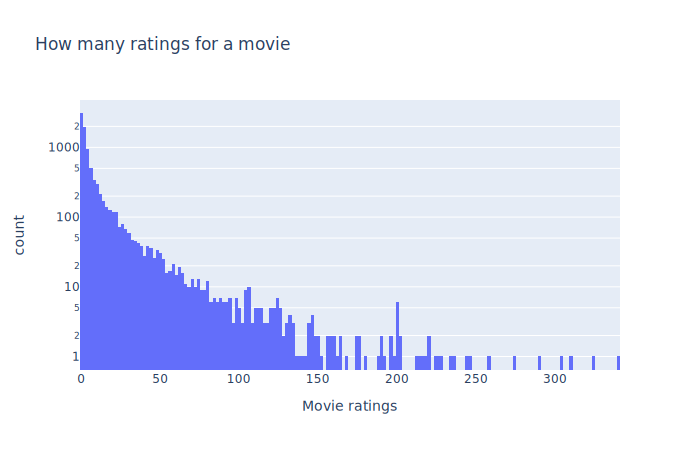

<IPython.core.display.Javascript object>

In [54]:
fig = px.histogram(
    movie_stats,
    x="count",
    title="How many ratings for a movie",
    labels={
        "count": "Movie ratings"
    },
    log_y=True
)

fig.show(renderer="svg")